In [16]:
!python scDREAMER_run_immune_human.py

===== Using device: cuda:0
Epoch : 0 c loss: 2.123374486334936 b loss: 0.4954240507092969
Epoch : 0 a loss: 586.439163149545
Epoch : 1 c loss: 1.9655442795077502 b loss: 0.4217732743970279
Epoch : 1 a loss: 510.3441828585219
Epoch : 2 c loss: 1.9797219882979704 b loss: 0.3961272618779734
Epoch : 2 a loss: 497.2907901924689
Epoch : 3 c loss: 1.9719915769109324 b loss: 0.37386953499582076
Epoch : 3 a loss: 488.2930089724018
Epoch : 4 c loss: 1.9665807937753612 b loss: 0.3479304723584332
Epoch : 4 a loss: 481.5680180692125
Epoch : 5 c loss: 1.9379592005777175 b loss: 0.30418015736729703
Epoch : 5 a loss: 475.76204146461924
Epoch : 6 c loss: 1.9213791834440268 b loss: 0.19693557358564545
Epoch : 6 a loss: 468.15375106636134
Epoch : 7 c loss: 1.9051991819878649 b loss: 0.026194126055363705
Epoch : 7 a loss: 462.1350103502529
Epoch : 8 c loss: 1.8930750304254993 b loss: -0.15427484611670175
Epoch : 8 a loss: 458.026263942207
Epoch : 9 c loss: 1.8831515901390163 b loss: -0.1796877671932352
Ep

Epoch : 79 c loss: 1.8242496220088096 b loss: -0.18459388489524522
Epoch : 79 a loss: 306.8317748321884
Epoch : 80 c loss: 1.8236718780692966 b loss: -0.19854534023452078
Epoch : 80 a loss: 306.5762060172713
Epoch : 81 c loss: 1.8152433729719841 b loss: -0.1966781233833439
Epoch : 81 a loss: 305.9179432602221
Epoch : 82 c loss: 1.82001335045387 b loss: -0.19332681148102457
Epoch : 82 a loss: 305.83509072490125
Epoch : 83 c loss: 1.8218649726261125 b loss: -0.19626642112759338
Epoch : 83 a loss: 304.48421142110425
Epoch : 84 c loss: 1.8219226032381313 b loss: -0.19088099335259634
Epoch : 84 a loss: 304.8362569407028
Epoch : 85 c loss: 1.8222345853674 b loss: -0.18593565280410065
Epoch : 85 a loss: 306.21322748761526
Epoch : 86 c loss: 1.8220964423541366 b loss: -0.17798537776673434
Epoch : 86 a loss: 304.64677750744585
Epoch : 87 c loss: 1.8218754635003336 b loss: -0.18368338582273644
Epoch : 87 a loss: 304.93652437290467
Epoch : 88 c loss: 1.821987132003024 b loss: -0.18368883626499852

In [3]:
import scanpy as sc
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

In [13]:
# Plotting...
import scanpy as sc
import pandas as pd

name = "Immune_Human" #"Pancreas"
data_path = "../Pan/Pancreas.h5ad"
data_path = "../Lung/Lung_atlas_public.h5ad"
data_path = "../Immune/Immune_Human_NA_0.5.h5ad" #Immune_Human_NA_0.5.h5ad, Immune_ALL_human.h5ad


batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation', # 16
                 'Lung' : 'cell_type', # 
                 'Pancreas' : 'celltype', #
                 'Human_Mouse' : "celltype", #
                 "Human_Retina":"Subcluster" #  
                  }  

Ann = sc.read_h5ad(data_path)

In [14]:
Ann

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'final_annotation_NA'
    var: 'gene_id-0', 'n_cells-0', 'gene_ids-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_id-3', 'n_cells-3', 'n_cells-4'

In [17]:
#_latent_matrix_run1, 
z = pd.read_csv("./output/" + name + "/" + name + "_latent_matrix.csv", header = None).to_numpy()
#z = pd.read_csv("Lung_z_300.csv").to_numpy()
z.shape

(33506, 10)

In [11]:
z.shape

(33506, 10)

/home/ajita/anaconda3/envs/scdreamer_py/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


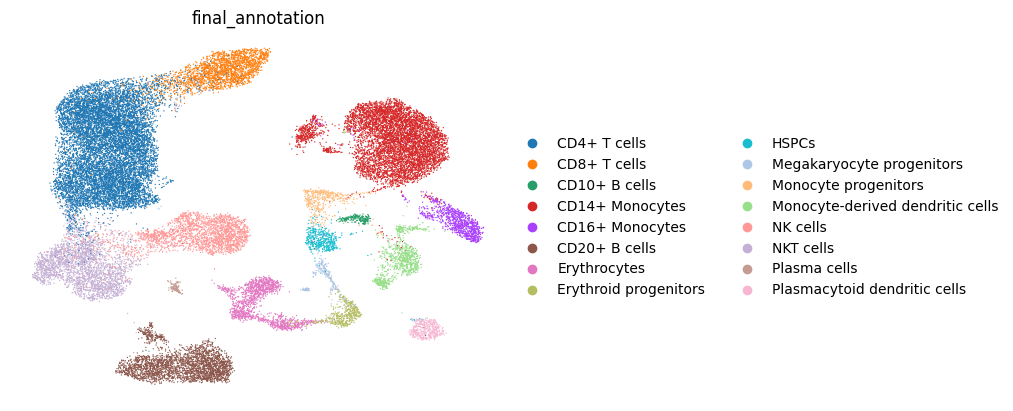

None


/home/ajita/anaconda3/envs/scdreamer_py/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


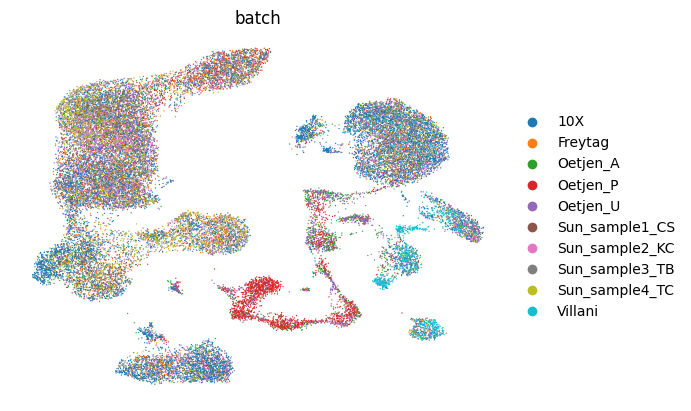

None


In [18]:
name = "Immune_Human"
Ann.obsm["final_embeddings"] = z

cell_type = cell_type_key_dic[name]
batch = batch_key_dic[name]


sc.pp.neighbors(Ann, use_rep = 'final_embeddings') #use_rep = 'final_embeddings'
sc.tl.umap(Ann)

img = sc.pl.umap(Ann, color = cell_type, frameon = False) # cells
print(img)


#Ann.obs['batch'] = self.batch_info.astype(str)
img2 = sc.pl.umap(Ann, color = batch, frameon = False)
print(img2)

In [26]:
z

array([[-1.92094111,  0.28918421, -0.78505564, ...,  0.10402989,
         1.58079576,  2.82012033],
       [ 4.7007618 , -0.15727437,  1.31262708, ..., -0.7069509 ,
         4.46687984, -1.39771307],
       [-0.89268172, -1.03052115, -0.74315542, ...,  2.52942181,
        -1.47539878,  0.82955128],
       ...,
       [-1.41925788, -1.46016586,  0.09104136, ..., -1.37524211,
        -0.13883966, -1.33120489],
       [-0.94496268,  2.13717914,  3.42874861, ...,  3.40903497,
         0.86655271,  3.08837318],
       [-0.66145217,  1.88003182,  1.5408324 , ...,  2.37229419,
        -1.08500051,  2.80485082]])